In [1]:
#Importando Bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import numpy as np
import seaborn as sns

$AAG1 - Metodos\ Quantitativos\ em\ Ciencias\ da\ Computação$

Alunos: Braulio Lucas e
Christian Scoralich



$Caracteristica\ do\ Dataset$

Para o trabalho foi usado um dataset de reviews dos usuarios em jogos de tabuleiros, onde cada jogo tem seu ID, Nome, Nota média.
Para geração dos gráficos foi utilizado a nota média dos jogos.

Fonte: https://www.kaggle.com/jvanelteren/boardgamegeek-reviews#bgg-13m-reviews.csv 

In [2]:
#Importando dataset para um DataFrame e ordenando pela coluna Average
df = pd.read_csv(r'C:\Users\Braulio\Documents\Python Scripts\2019-05-022.csv', delimiter=',', low_memory=False)
avg = df['Average'].sort_values(ascending=True)

In [3]:
#Definindo variaveis e contando valores e suas ocorrencias
counter = dict()
totNumbers = len(avg)
for n in avg:
    try:
        counter[n] +=1
    except KeyError:
        counter[n] = 1

cdfK = [] #Keys
cdfV = [] #Values
pdfV = [] #PDFValues
rawValue = []
lastVal = 0 

for key,value in counter.items():
    lastVal += (value/totNumbers)
    rawValue.append(key)
    cdfK.append(key)
    cdfV.append(lastVal)

#Calculo da derivada aproximado sem lib
# f(x1)' = (y2 - y1)/(x2 - x1)
for i in range(len(cdfV)-1):
    pdfV.append((cdfV[i+1]-cdfV[i])/(cdfK[i+1]-cdfK[i]))

$Gráfico\ CDF\ Continua\ sem\ lib$

De acordo que as notas(eixoX) vão se aproximando de 10 acordo que probabilidade aumenta

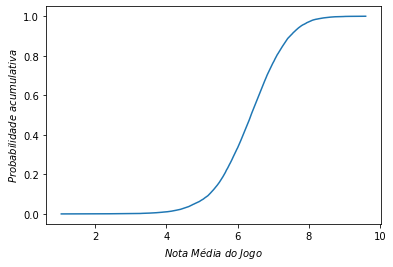

In [4]:
#Plotando CDF sem lib
plt.plot(cdfK,cdfV)
plt.xlabel('$Nota\ Média\ do\ Jogo$')
plt.ylabel('$Probabilidade\ acumulativa$')
plt.show()


$Gráfico\ da\ PDF\ sem\ lib$

Área do grafico onde se tem maior parte das notas

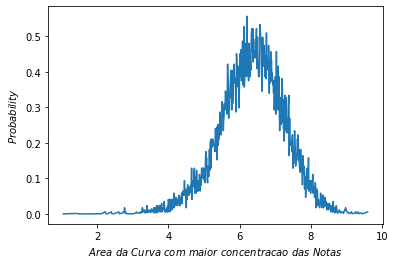

In [5]:
plt.plot(cdfK[:-1],pdfV)
plt.xlabel('$Area\ da\ Curva\ com\ maior\ concentracao\ das\ Notas$')
plt.ylabel('$Probability$')
plt.show()

$PDF\ e\ CDF\ no\ mesmo\ gráfico$

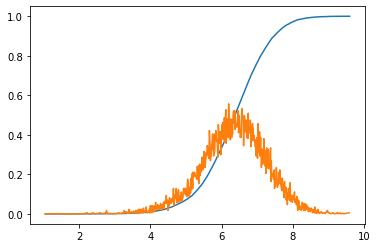

In [6]:
plt.plot(cdfK,cdfV)
plt.plot(cdfK[:-1],pdfV)
plt.show() 

Repetindo as operações de variaveis e contadores de ocorrencia da CDF Continua e PDF, porém, com contador para PMF

In [7]:
#Repetindo operações da CDF e PDF
df = pd.read_csv(r'C:\Users\Braulio\Documents\Python Scripts\2019-05-022.csv', delimiter=',', low_memory=False)
#pd.options.display.float_format = '{:,.0f}'.format
avg = df['Average'].sort_values(ascending=True)
avg.astype(int)
counter = dict()
totNumbers = len(avg)
for n in avg.astype(int):
    try:
        counter[n] +=1
    except KeyError:
        counter[n] = 1
cdfK = []
cdfV = []
pdfV = []
pmfV = []
rawValue = []
lastVal = 0
for key,value in counter.items():
    lastVal += (value/totNumbers)
    rawValue.append(key)
    cdfK.append(key)
    cdfV.append(lastVal)
    pmfV.append(value/totNumbers)

#Calculo da derivada aproximado
# f(x1)' = (y2 - y1)/(x2 - x1)
for i in range(len(cdfV)-1):
    pdfV.append((cdfV[i+1]-cdfV[i])/(cdfK[i+1]-cdfK[i]))


$CDF\ discreta\ sem\ lib$

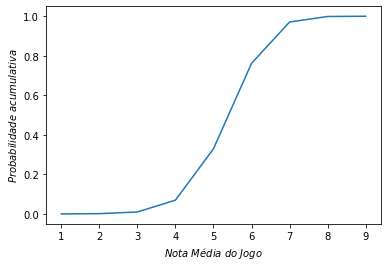

In [8]:
plt.plot(cdfK,cdfV)
plt.xlabel('$Nota\ Média\ do\ Jogo$')
plt.ylabel('$Probabilidade\ acumulativa$')
plt.show()

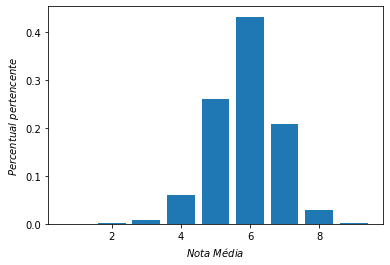

In [9]:
#PMF sem lib
plt.bar(cdfK,pmfV)
plt.ylabel("$Percentual\ pertencente$")
plt.xlabel("$Nota\ Média$")
plt.show()

$Cada\ barra\ corresponde\ ao\ Int\ de\ uma\ Nota\ no\ eixoX\ e\ o\ eixoY\ corresponde\ ao\ percentual\ de\ notas\ naquele\ valor\ contidas\ no\ dataset$